In [4]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


In [7]:
#Loading data
housing_original=pd.read_csv('housing.csv')
housing_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing_original.iloc[:,:6].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population
0,-122.23,37.88,41.0,880.0,129.0,322.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0


In [9]:
#cheak the value count
housing_original['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [10]:
# making the ocean_proximity data more defined
housing=housing_original[housing_original['ocean_proximity']!='ISLAND']
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
Name: count, dtype: int64

In [19]:
#making the ocean_proximity hot encoded
housing.iloc[[1,200,1000,1850,5000],9:]
# print(housing.head())
# print(housing_original)


,dmy_<1H OCEAN,dmy_INLAND,dmy_NEAR BAY,dmy_NEAR OCEAN
1,0,0,1,0
200,0,0,1,0
1000,0,1,0,0
1850,0,0,0,1
5000,1,0,0,0


In [20]:
# training
train_full, test=train_test_split(housing,test_size=0.2,random_state=40)
train,val=train_test_split(housing,test_size=0.25,random_state=36)

In [21]:
# EDA exploring data analysis
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15476 entries, 15051 to 610
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           15476 non-null  float64
 1   latitude            15476 non-null  float64
 2   housing_median_age  15476 non-null  float64
 3   total_rooms         15476 non-null  float64
 4   total_bedrooms      15325 non-null  float64
 5   population          15476 non-null  float64
 6   households          15476 non-null  float64
 7   median_income       15476 non-null  float64
 8   median_house_value  15476 non-null  float64
 9   dmy_<1H OCEAN       15476 non-null  int64  
 10  dmy_INLAND          15476 non-null  int64  
 11  dmy_NEAR BAY        15476 non-null  int64  
 12  dmy_NEAR OCEAN      15476 non-null  int64  
dtypes: float64(9), int64(4)
memory usage: 1.7 MB


In [22]:
# delete the missed data
train=train.dropna()
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15325 entries, 15051 to 610
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           15325 non-null  float64
 1   latitude            15325 non-null  float64
 2   housing_median_age  15325 non-null  float64
 3   total_rooms         15325 non-null  float64
 4   total_bedrooms      15325 non-null  float64
 5   population          15325 non-null  float64
 6   households          15325 non-null  float64
 7   median_income       15325 non-null  float64
 8   median_house_value  15325 non-null  float64
 9   dmy_<1H OCEAN       15325 non-null  int64  
 10  dmy_INLAND          15325 non-null  int64  
 11  dmy_NEAR BAY        15325 non-null  int64  
 12  dmy_NEAR OCEAN      15325 non-null  int64  
dtypes: float64(9), int64(4)
memory usage: 1.6 MB


In [23]:
#we do same for validation and testing data
val=val.dropna()
test=test.dropna()

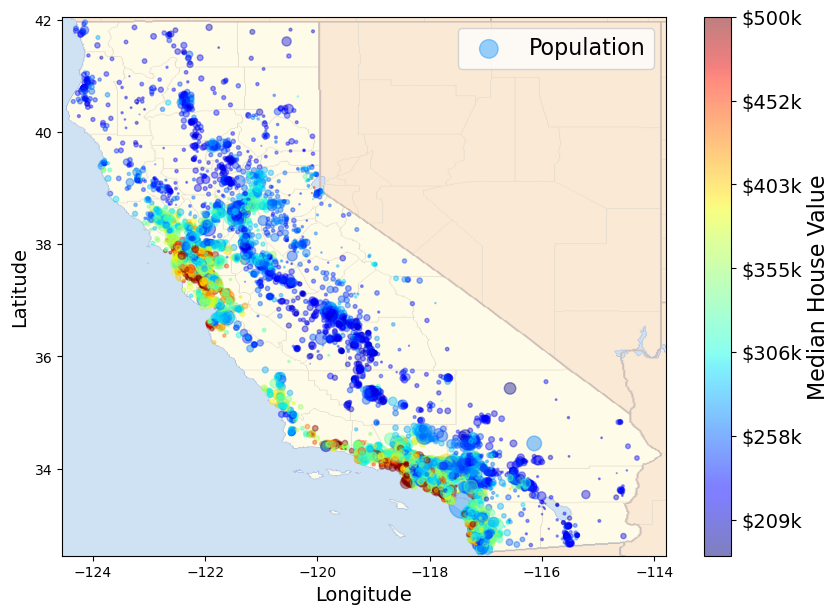

In [31]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

california_img = mpimg.imread("california.png")

# Scatter plot of housing data
ax = train.plot(kind="scatter", x="longitude", y="latitude", 
                figsize=(10, 7),
                s=train["population"]/100, label="Population",
                c="median_house_value", cmap=plt.get_cmap("jet"),
                colorbar=False, alpha=0.4)

# Overlay the California map
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], 
           alpha=0.5, cmap=plt.get_cmap("jet"))

plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

# Add colorbar with custom ticks
prices = train["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk" % (round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label("Median House Value", fontsize=16)

# Legend
plt.legend(fontsize=16)
plt.show()


In [32]:
# correlation
corr_matrix=train.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688430
dmy_<1H OCEAN         0.258619
dmy_NEAR BAY          0.156958
dmy_NEAR OCEAN        0.147922
total_rooms           0.131885
housing_median_age    0.102571
households            0.062930
total_bedrooms        0.047418
population           -0.029492
longitude            -0.042094
latitude             -0.147358
dmy_INLAND           -0.486426
Name: median_house_value, dtype: float64

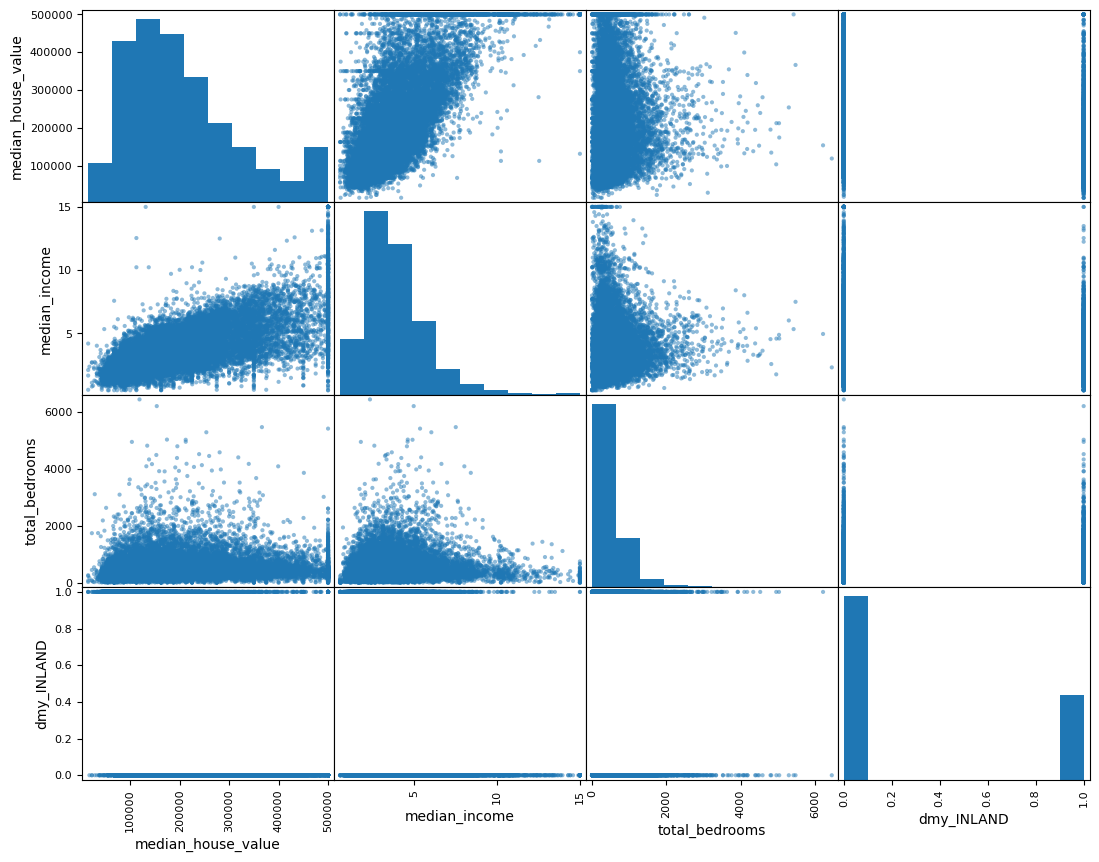

In [33]:
# correlation overview
Attributes=['median_house_value','median_income','total_bedrooms','dmy_INLAND']
pd.plotting.scatter_matrix(housing[Attributes],figsize=(13,10))
plt.show()

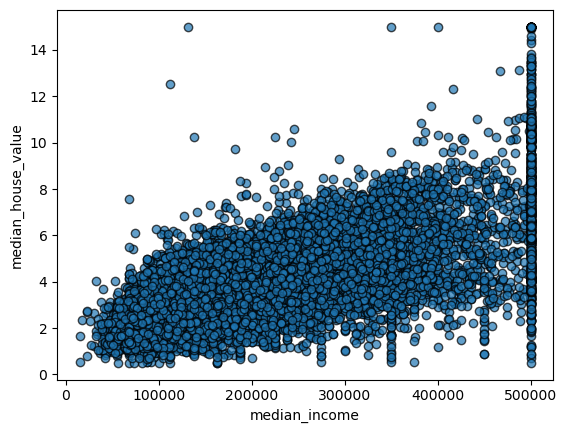

In [36]:
#correlation between the houses value and the income

plt.scatter(train['median_house_value'],train['median_income'],alpha=0.7,edgecolors='k')
plt.ylabel('median_house_value')
plt.xlabel('median_income')
plt.show()

<Axes: xlabel='dmy_NEAR OCEAN', ylabel='median_house_value'>

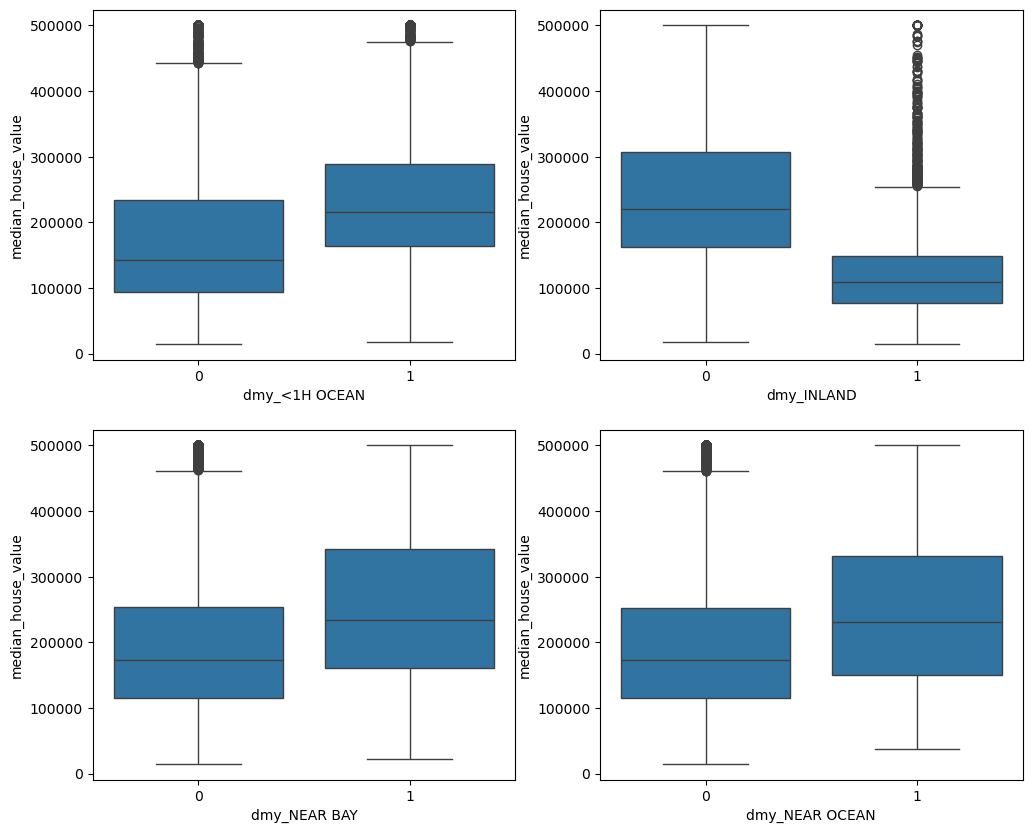

In [42]:
fig,axes=plt.subplots(2,2,figsize=(12,10))
sns.boxplot(data=train,x='dmy_<1H OCEAN',y='median_house_value',ax=axes[0,0])
sns.boxplot(data=train,x='dmy_INLAND',y='median_house_value',ax=axes[0,1])
sns.boxplot(data=train,x='dmy_NEAR BAY',y='median_house_value',ax=axes[1,0])
sns.boxplot(data=train,x='dmy_NEAR OCEAN',y='median_house_value',ax=axes[1,1])

In [55]:
#Modeling

X_train_full_data=train_full.drop(columns=['median_house_value'])
y_train_full_data=train_full['median_house_value']

X_train,y_train=train.drop(columns=['median_house_value']),train['median_house_value']

X_val,y_val=val.drop(columns=['median_house_value']),val['median_house_value']

X_test,y_test=test.drop(columns=['median_house_value']),test['median_house_value']

print(X_train.shape)
print(y_train.shape)







(15325, 12)
(15325,)


In [56]:
# Linear Model

from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [57]:
# forest model / demonstrate the training time 
import time
from sklearn.ensemble import RandomForestRegressor

start_time=time.time()

rf=RandomForestRegressor()

hyperparam_grid={'max_depth':[5,10,15,50],'n_estimators':[1,5,10]}

grid_search=GridSearchCV(rf,hyperparam_grid,scoring='neg_root_mean_squared_error',cv=5)

grid_search.fit(X_train, y_train)

end_time=time.time()
exicution_time=end_time-start_time
print(f'GridSearchCV fitting took {exicution_time:.4f} seconds')
print('Best hyperparameters from GridSearchCV: ',grid_search.best_params_)


GridSearchCV fitting took 13.1397 seconds
Best hyperparameters from GridSearchCV:  {'max_depth': 50, 'n_estimators': 10}


In [58]:
# by validating the data, will see the best modeling

lr_pred_val=lin_reg.predict(X_val)
rf_pred_val=grid_search.predict(X_val)

print('RMSE Linear Regression: ',root_mean_squared_error(y_val,lr_pred_val))
print('RMSE Random Forest Regression: ',root_mean_squared_error(y_val,rf_pred_val))



RMSE Linear Regression:  67601.80164751715
RMSE Random Forest Regression:  50363.79745199941


In [59]:
print(np.mean(y_val))
print(root_mean_squared_error(y_val,rf_pred_val)/np.mean(y_val))

206529.26161081716
0.2438579262773172


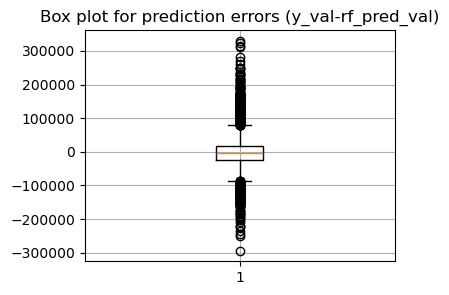

In [60]:
errors=y_val-rf_pred_val
plt.figure(figsize=(4,3))
plt.boxplot(errors)
plt.title('Box plot for prediction errors (y_val-rf_pred_val)')
plt.grid(True)

In [61]:
#seeing the optimal Hyperparamters

best_params=grid_search.best_params_
best_params

{'max_depth': 50, 'n_estimators': 10}

In [63]:
best_rf=RandomForestRegressor(**best_params)
best_rf.fit(X_train_full_data,y_train_full_data)

,n_estimators,10
,criterion,'squared_error'
,max_depth,50
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [64]:
best_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 50,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [65]:
rf_pred_test=best_rf.predict(X_test)
rmse_test=root_mean_squared_error(y_test,rf_pred_test)
print('RMSE random forest on test data: ',rmse_test)
print(rmse_test/np.mean(y_test))

RMSE random forest on test data:  51208.9340135344
0.24767982272684028


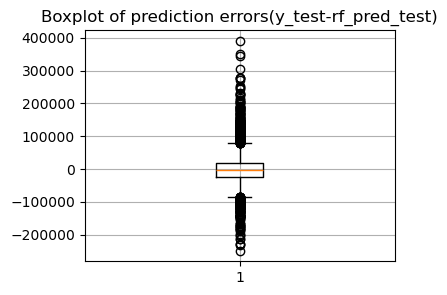

In [66]:
#box ploting error 
errors=y_test -rf_pred_test

plt.figure(figsize=(4,3))
plt.boxplot(errors)
plt.title('Boxplot of prediction errors(y_test-rf_pred_test)')
plt.grid(True)

In [69]:
import joblib
X_full=housing.drop(columns=['median_house_value'])
y_full=housing['median_house_value']

saved_model=RandomForestRegressor(**best_params)
saved_model.fit(X_full,y_full)

joblib.dump(saved_model,'rf_saved_model.pk1')

['rf_saved_model.pk1']

In [70]:
# predicting house value for 2 districts

new_districts = pd.DataFrame({
    'longitude': [-118.30, -117.85],
    'latitude': [34.20, 33.90],
    'housing_median_age': [35.0, 20.0],
    'total_rooms': [880.0, 1200.0],
    'total_bedrooms': [200.0, 300.0],
    'population': [500.0, 750.0],
    'households': [220.0, 280.0],
    'median_income': [4.2, 5.1],
    'dmy_<1H OCEAN': [0, 1],
    'dmy_INLAND': [1, 0],
    'dmy_NEAR BAY': [0, 0],
    'dmy_NEAR OCEAN': [0, 0]
})

predicted_values = saved_model.predict(new_districts)

for i, value in enumerate(predicted_values, start=1):
    print(f"Predicted median house value for district {i}: ${value:,.2f}")

Predicted median house value for district 1: $182,059.90
Predicted median house value for district 2: $183,430.00
